### Code

In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce

In [2]:
# Load data from csv
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
nuni = df.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [8]:
df = df.drop(columns=['PoolQC','Fence', 'MiscFeature'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [11]:
df.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [12]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [13]:
df=df.drop(columns=['Alley'])

In [14]:
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [15]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [16]:
df.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [17]:
LotFrontage_median = df.LotFrontage.median()
LotFrontage_median

69.0

In [18]:
df.LotFrontage = df.LotFrontage.fillna(LotFrontage_median)

In [19]:
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median())    

In [20]:
df.MasVnrType = df.MasVnrType.fillna('None')

In [21]:
df.BsmtQual = df.BsmtQual.fillna('NA')

In [22]:
df.BsmtCond = df.BsmtCond.fillna('NA')

In [23]:
df.BsmtExposure = df.BsmtExposure.fillna('No')

In [24]:
df.BsmtFinType1 = df.BsmtFinType1.fillna('NA')

In [25]:
df.BsmtFinType2 = df.BsmtFinType2.fillna('NA')

In [26]:
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])    

In [27]:
df.GarageType = df.GarageType.fillna('NA')

In [28]:
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

In [29]:
#replace Nan values of GarageFinish with NA i.e. No Garage
df.GarageFinish = df.GarageFinish.fillna('NA')

In [30]:
#replace Nan values of GarageQual with NA i.e. No Garage
df.GarageQual = df.GarageQual.fillna('NA')

In [31]:
#replace Nan values of GarageFinish with NA i.e. No Garage
df.GarageQual = df.GarageQual.fillna('NA')

In [32]:
#replace Nan values of GarageCond with NA i.e. No Garage
df.GarageCond = df.GarageCond.fillna('NA')

In [33]:
#check missing values again
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [34]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
df['HouseAge'] = df.YrSold - df.YearBuilt

In [35]:
#Drop YrSold, YearBuilt after HouseAge
df=df.drop(columns=['YrSold', 'YearBuilt'])

In [36]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
df = df.astype(convert_dict)

In [37]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [38]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [39]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
df = df.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [40]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
df = df.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [41]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [42]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [43]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [44]:
df.ExterQual.value_counts()

ExterQual
3    906
4    488
5     52
2     14
Name: count, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [46]:
for c in df.columns:
    if df[c].dtype == object :
        print(c)
        print(df[c].value_counts(normalize=True))

MSSubClass
MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: flo

In [47]:
#Drop columns which have moe than 80% bias data
df=df.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [49]:
#Get all object type columns
object_columns = []
for c in df.columns:
    if df[c].dtype == object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Create Dummy Varibales

In [50]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(df['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main df df
df = pd.concat([df,MSSubClass_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [51]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(df['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [52]:
#concat MSZoning_df with main df df
df = pd.concat([df,MSZoning_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [53]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(df['LotShape'],drop_first=True, prefix='LotShape')

In [54]:
#concat LotShape_df with main df df
df = pd.concat([df,LotShape_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [55]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(df['LotConfig'],drop_first=True, prefix='LotConfig')

In [56]:
#concat LotConfig_df with main df df
df = pd.concat([df,LotConfig_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [57]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(df['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main df df
df = pd.concat([df,Neighborhood_df],axis=1)
df.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [58]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(df['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main df df
df = pd.concat([df,HouseStyle_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False

In [59]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(df['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main df df
df = pd.concat([df,RoofStyle_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PCon

In [60]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(df['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main df df
df = pd.concat([df,Exterior1st_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,

In [61]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(df['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main df df
df = pd.concat([df,Exterior2nd_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,Fal

In [62]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(df['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main df df
df = pd.concat([df,MasVnrType_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False

In [63]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(df['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main df df
df = pd.concat([df,Foundation_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkF

In [64]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(df['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main df df
df = pd.concat([df,GarageType_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fa

In [65]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(df['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main df df
df = pd.concat([df,GarageFinish_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,

In [66]:
df.shape

(1460, 162)

In [67]:
#Drop categorical variables after ceating dummy varaibles
df=df.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: bool(107), float64(3), int64(39)
memory usage: 631.8 KB


### Prepairing Data For Modeling

In [69]:
df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [70]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.691479,3.593536,448.165524,50.087169,563.745348,1061.998041,4.150833,1168.611166,343.540646,5.999021,1518.150833,0.439765,0.059745,1.567091,0.377081,2.856024,1.053869,3.511263,6.504407,0.598433,1.798237,1868.316357,1.771792,471.995103,92.641528,47.035260,23.241920,3.940255,14.047013,2.149853,48.711068,6.288932,180609.596474,36.497551
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.058956,2.114914,465.115135,170.847470,448.739203,459.098042,0.974565,397.896911,435.498994,48.207914,531.849898,0.525381,0.241230,0.551872,0.500807,0.819993,0.230169,0.659114,1.605514,0.645769,1.825859,455.160037,0.746119,212.213075,124.479090,66.195468,63.167621,32.333667,51.081766,34.524133,578.364428,2.748576,79099.444132,30.346064
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,216.000000,793.000000,3.000000,876.000000,0.000000,0.000000,1135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1958.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,129500.000000,8.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,392.000000,0.000000,462.000000,994.000000,5.000000,1086.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,1978.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,161000.000000,34.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,712.000000,0.000000,806.000000,1314.000000,5.000000,1422.000000,728.000000,0.000000,1774.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,4.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,215000.000000,54.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,5644.000000,1474.000000,2336.000000,6110.000000,5.000000,4692.000000,2065.000000,515.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,5.000000,14.000000,3.000000,5.000000,2010.000000,4.000000,1418.000000,857.000000,523.000000,552.000000,508.000000,374.000000,648.000000,15500.000000,12.000000,755000.000000,136.000000


### Rescalling The Numeric Factors

In [71]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,Fals

In [72]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03
mean,-1.043892e-17,-7.655211e-17,-2.696722e-16,1.539741e-16,-8.420732e-16,-6.611318e-17,1.243972e-16,1.287467e-16,6.263354e-17,8.612112e-17,-6.437336e-17,-1.870307e-17,-1.304865e-17,1.879006e-16,-3.270863e-16,0.000000,-6.350345e-17,-1.130883e-17,-5.915390e-17,4.871498e-17,-5.219462e-18,6.611318e-17,4.784507e-17,-3.479641e-18,3.862402e-16,3.070783e-16,-2.392253e-16,9.395031e-17,-2.435749e-17,2.296563e-16,7.481229e-17,-9.569013e-17,-4.523534e-17,-7.133264e-17,5.306453e-17,-2.087785e-17,-3.479641e-18,0.000000,-1.391856e-17,5.567426e-17,180609.596474,-9.742995e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,79099.444132,1.000490e+00
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,-9.640305e-01,-2.933126e-01,-1.256903e+00,-2.314361e+00,-3.234651e+00,-2.003035,-7.892303e-01,-1.245016e-01,-2.031927e+00,-8.374505e-01,-2.477915e-01,-2.840982e+00,-7.533165e-01,-3.484694e+00,-2.341549e-01,-2.293993e+00,-2.183802e+00,-9.271528e-01,-9.853544e-01,-4.106758e+00,-2.375841e+00,-2.225247e+00,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.925187e+00,34900.000000,-1.203301e+00
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,-9.640305e-01,-2.933126e-01,-7.753184e-01,-5.862144e-01,-1.181447e+00,-0.735755,-7.892303e-01,-1.245016e-01,-7.207646e-01,-8.374505e-01,-2.477915e-01,-1.028080e+00,-7.533165e-01,-1.044452e+00,-2.341549e-01,-7.760625e-01,-9.374844e-01,-9.271528e-01,-9.853544e-01,1.971342e-01,-1.034916e+00,-6.694436e-01,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-8.331783e-01,129500.000000,-9.395458e-01
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,-1.208154e-01,-2.933126e-01,-2.268472e-01,-1.481848e-01,8.717571e-01,-0.207721,-7.892303e-01,-1.245016e-01,-9.810360e-02,-8.374505e-01,-2.477915e-01,7.848212e-01,-7.533165e-01,1.756687e-01,-2.341549e-01,-7.760625e-01,-3.143258e-01,6.221483e-01,1.105572e-01,2.410963e-01,3.060094e-01,3.773952e-02,-7.445984e-01,-3.179307e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.051723e-01,161000.000000,-8.234265e-02
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,5.6752

### Training The Model

In [73]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [74]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

### RFE- Recursive Feature Elimination

___Take Top 35 Features from `RFE`___

In [75]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 35)
rfe = rfe.fit(X_train,y_train)

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 4),
 ('LotArea', False, 4),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('YearRemodAdd', False, 4),
 ('MasVnrArea', False, 3),
 ('ExterQual', False, 4),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 4),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 4),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 4),
 ('BsmtHalfBath', False, 4),
 ('FullBath', False, 4),
 ('HalfBath', False, 4),
 ('BedroomAbvGr', False, 4),
 ('KitchenAbvGr', False, 4),
 ('KitchenQual', False, 3),
 ('TotRmsAbvGrd', False, 4),
 ('Fireplaces', False, 3),
 ('FireplaceQu', False, 3),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 4),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 4),
 ('OpenPorchSF', False, 4),
 ('EnclosedPorch', False, 4),
 ('3SsnPorch', False, 4),
 ('ScreenPorch', False, 4),
 

In [77]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_120', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
    

In [78]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge', 'MSSubClass_40', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Timber',
       'Ho

### Building model using statsmodel, for the detailed statistics

In [79]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [80]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [81]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()  #Running the linear Model

In [82]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     75.07
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:41   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                     952   BIC:                         2.452e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.388e+05   2.56e+04      5.428      0.000    8.86e+04    1.89e+05
OverallQual           2.073e+04   1975.191     10.497      0.000    1.69e+04    2.46e+04
BsmtQual              9609.1774   2010.755      4.779      0.000    5663.153    1.36e+04
BsmtExposure          1.198e+04   1273.949      9.402      0.000    9477.477    1.45e+04
BsmtFinSF1            2920.2282   1110.311      2.630      0.009     741.288    5099.168
BsmtFinSF2              10.6688   1086.719      0.010      0.992   -2121.972    2143.310
BsmtUnfSF            -3792.7703   1096.931     -3.458      0.001   -5945.452   -1640.088
TotalBsmtSF           -744.7203   1824.273     -0.408      0.683   -4324.781    2835.340
1stFlrSF              7978.9677   2090.362      3.817      0.000    3876.717    1.21e+04
2ndFlrSF              1.718e+04   1989.636      8.635      0.000    1.33e+04    2.11e+04
LowQualFinSF          -972.7916   1218.608     -0.798      0.425   -3364.260    1418.677
GrLivArea             1.995e+04   1209.002     16.500      0.000    1.76e+04    2.23e+04
GarageYrBlt            8.13e+04   3.19e+04      2.548      0.011    1.87e+04    1.44e+05
MSSubClass_30           85.3893   5961.636      0.014      0.989   -1.16e+04    1.18e+04
MSSubClass_45        -7439.4266   2.53e+04     -0.294      0.769   -5.71e+04    4.23e+04
MSSubClass_50         1.642e+04   4470.611      3.673      0.000    7645.240    2.52e+04
MSSubClass_75         3.204e+04   1.98e+04      1.620      0.105   -6763.193    7.08e+04
MSSubClass_120       -2.992e+04   4847.286     -6.172      0.000   -3.94e+04   -2.04e+04
LotShape_IR2          7537.2325   6224.123      1.211      0.226   -4677.353    1.98e+04
LotShape_IR3         -3.252e+04   1.14e+04     -2.857      0.004   -5.48e+04   -1.02e+04
LotConfig_CulDSac     1.266e+04   4479.327      2.825      0.005    3865.135    2.14e+04
LotConfig_FR2        -1.613e+04   6272.344     -2.571      0.010   -2.84e+04   -3816.431
Neighborhood_BrDale  -1.116e+04   1.03e+04     -1.086      0.278   -3.13e+04    9010.975
Neighborhood_Crawfor  3.462e+04   6435.592      5.379      0.000     2.2e+04    4.72e+04
Neighborhood_Edwards -1.298e+04   4310.557     -3.012      0.003   -2.14e+04   -4522.976
Neighborhood_MeadowV -1.688e+04   1.34e+04     -1.255      0.210   -4.33e+04    9515.351
Neighborhood_NoRidge  5.915e+04   6595.447      8.969      0.000    4.62e+04    7.21e+04
Neighborhood_NridgHt  5.944e+04   5425.469     10.956      0.000    4.88e+04    7.01e+04
Neighborhood_SWISU     852.2168   8351.370      0.102      0.919   -1.55e+04    1.72e+04
Neighborhood_SawyerW  2883.7365   5308.810      0.543      0.587   -7534.585    1.33e+04
Neighborhood_Somerst  2.153e+04   5012.643      4.295      0.000    1.17e+04    3.14e+04
Neighborhood_StoneBr  3.728e+04   9947.892      3.748    

In [83]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(np.array(X_train_rfe.values, dtype=float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
74,GarageFinish_NA,inf
43,Exterior1st_AsphShn,inf
73,GarageType_NA,inf
59,Exterior2nd_CBlock,inf
4,BsmtFinSF1,inf
...,...,...
49,Exterior1st_ImStucc,1.13
21,LotConfig_FR2,1.12
18,LotShape_IR2,1.11
19,LotShape_IR3,1.10


___GarageType_NA has higher p-value. Lets drop it.___

In [84]:
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [85]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_120', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1s

___Rebuild the model without GarageType_NA___

In [86]:
X_train_lm = sm.add_constant(X_train_new)

In [87]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [88]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     75.07
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:42   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                     952   BIC:                         2.452e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.388e+05   2.56e+04      5.428      0.000    8.86e+04    1.89e+05
OverallQual           2.073e+04   1975.191     10.497      0.000    1.69e+04    2.46e+04
BsmtQual              9609.1774   2010.755      4.779      0.000    5663.153    1.36e+04
BsmtExposure          1.198e+04   1273.949      9.402      0.000    9477.477    1.45e+04
BsmtFinSF1            2920.2282   1110.311      2.630      0.009     741.288    5099.168
BsmtFinSF2              10.6688   1086.719      0.010      0.992   -2121.972    2143.310
BsmtUnfSF            -3792.7703   1096.931     -3.458      0.001   -5945.452   -1640.088
TotalBsmtSF           -744.7203   1824.273     -0.408      0.683   -4324.781    2835.340
1stFlrSF              7978.9677   2090.362      3.817      0.000    3876.717    1.21e+04
2ndFlrSF              1.718e+04   1989.636      8.635      0.000    1.33e+04    2.11e+04
LowQualFinSF          -972.7916   1218.608     -0.798      0.425   -3364.260    1418.677
GrLivArea             1.995e+04   1209.002     16.500      0.000    1.76e+04    2.23e+04
GarageYrBlt            8.13e+04   3.19e+04      2.548      0.011    1.87e+04    1.44e+05
MSSubClass_30           85.3893   5961.636      0.014      0.989   -1.16e+04    1.18e+04
MSSubClass_45        -7439.4266   2.53e+04     -0.294      0.769   -5.71e+04    4.23e+04
MSSubClass_50         1.642e+04   4470.611      3.673      0.000    7645.240    2.52e+04
MSSubClass_75         3.204e+04   1.98e+04      1.620      0.105   -6763.193    7.08e+04
MSSubClass_120       -2.992e+04   4847.286     -6.172      0.000   -3.94e+04   -2.04e+04
LotShape_IR2          7537.2325   6224.123      1.211      0.226   -4677.353    1.98e+04
LotShape_IR3         -3.252e+04   1.14e+04     -2.857      0.004   -5.48e+04   -1.02e+04
LotConfig_CulDSac     1.266e+04   4479.327      2.825      0.005    3865.135    2.14e+04
LotConfig_FR2        -1.613e+04   6272.344     -2.571      0.010   -2.84e+04   -3816.431
Neighborhood_BrDale  -1.116e+04   1.03e+04     -1.086      0.278   -3.13e+04    9010.975
Neighborhood_Crawfor  3.462e+04   6435.592      5.379      0.000     2.2e+04    4.72e+04
Neighborhood_Edwards -1.298e+04   4310.557     -3.012      0.003   -2.14e+04   -4522.976
Neighborhood_MeadowV -1.688e+04   1.34e+04     -1.255      0.210   -4.33e+04    9515.351
Neighborhood_NoRidge  5.915e+04   6595.447      8.969      0.000    4.62e+04    7.21e+04
Neighborhood_NridgHt  5.944e+04   5425.469     10.956      0.000    4.88e+04    7.01e+04
Neighborhood_SWISU     852.2168   8351.370      0.102      0.919   -1.55e+04    1.72e+04
Neighborhood_SawyerW  2883.7365   5308.810      0.543      0.587   -7534.585    1.33e+04
Neighborhood_Somerst  2.153e+04   5012.643      4.295      0.000    1.17e+04    3.14e+04
Neighborhood_StoneBr  3.728e+04   9947.892      3.748    

___Exterior1st_CBlock has higher p-value. Lets drop it.___

In [89]:
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

___Rebuild the model without Exterior1st_CBlock___

In [90]:
X_train_lm = sm.add_constant(X_train_new)

In [91]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [92]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     75.07
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:42   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                     952   BIC:                         2.452e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.388e+05   2.56e+04      5.428      0.000    8.86e+04    1.89e+05
OverallQual           2.073e+04   1975.191     10.497      0.000    1.69e+04    2.46e+04
BsmtQual              9609.1774   2010.755      4.779      0.000    5663.153    1.36e+04
BsmtExposure          1.198e+04   1273.949      9.402      0.000    9477.477    1.45e+04
BsmtFinSF1            2920.2282   1110.311      2.630      0.009     741.288    5099.168
BsmtFinSF2              10.6688   1086.719      0.010      0.992   -2121.972    2143.310
BsmtUnfSF            -3792.7703   1096.931     -3.458      0.001   -5945.452   -1640.088
TotalBsmtSF           -744.7203   1824.273     -0.408      0.683   -4324.781    2835.340
1stFlrSF              7978.9677   2090.362      3.817      0.000    3876.717    1.21e+04
2ndFlrSF              1.718e+04   1989.636      8.635      0.000    1.33e+04    2.11e+04
LowQualFinSF          -972.7916   1218.608     -0.798      0.425   -3364.260    1418.677
GrLivArea             1.995e+04   1209.002     16.500      0.000    1.76e+04    2.23e+04
GarageYrBlt            8.13e+04   3.19e+04      2.548      0.011    1.87e+04    1.44e+05
MSSubClass_30           85.3893   5961.636      0.014      0.989   -1.16e+04    1.18e+04
MSSubClass_45        -7439.4266   2.53e+04     -0.294      0.769   -5.71e+04    4.23e+04
MSSubClass_50         1.642e+04   4470.611      3.673      0.000    7645.240    2.52e+04
MSSubClass_75         3.204e+04   1.98e+04      1.620      0.105   -6763.193    7.08e+04
MSSubClass_120       -2.992e+04   4847.286     -6.172      0.000   -3.94e+04   -2.04e+04
LotShape_IR2          7537.2325   6224.123      1.211      0.226   -4677.353    1.98e+04
LotShape_IR3         -3.252e+04   1.14e+04     -2.857      0.004   -5.48e+04   -1.02e+04
LotConfig_CulDSac     1.266e+04   4479.327      2.825      0.005    3865.135    2.14e+04
LotConfig_FR2        -1.613e+04   6272.344     -2.571      0.010   -2.84e+04   -3816.431
Neighborhood_BrDale  -1.116e+04   1.03e+04     -1.086      0.278   -3.13e+04    9010.975
Neighborhood_Crawfor  3.462e+04   6435.592      5.379      0.000     2.2e+04    4.72e+04
Neighborhood_Edwards -1.298e+04   4310.557     -3.012      0.003   -2.14e+04   -4522.976
Neighborhood_MeadowV -1.688e+04   1.34e+04     -1.255      0.210   -4.33e+04    9515.351
Neighborhood_NoRidge  5.915e+04   6595.447      8.969      0.000    4.62e+04    7.21e+04
Neighborhood_NridgHt  5.944e+04   5425.469     10.956      0.000    4.88e+04    7.01e+04
Neighborhood_SWISU     852.2168   8351.370      0.102      0.919   -1.55e+04    1.72e+04
Neighborhood_SawyerW  2883.7365   5308.810      0.543      0.587   -7534.585    1.33e+04
Neighborhood_Somerst  2.153e+04   5012.643      4.295      0.000    1.17e+04    3.14e+04
Neighborhood_StoneBr  3.728e+04   9947.892      3.748    

___Exterior2nd_CBlock has higher p-value. Lets drop it.___

In [93]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

___Rebuild the model without Exterior2nd_CBlock___

In [94]:
X_train_lm = sm.add_constant(X_train_new)

In [95]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [96]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     76.26
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:42   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     953   BIC:                         2.451e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.385e+05   2.55e+04      5.424      0.000    8.84e+04    1.89e+05
OverallQual           2.075e+04   1972.878     10.520      0.000    1.69e+04    2.46e+04
BsmtQual              9599.1549   2009.448      4.777      0.000    5655.702    1.35e+04
BsmtExposure          1.198e+04   1273.308      9.408      0.000    9480.811    1.45e+04
BsmtFinSF1            2914.0565   1109.544      2.626      0.009     736.624    5091.489
BsmtFinSF2               3.8234   1085.905      0.004      0.997   -2127.217    2134.864
BsmtUnfSF            -3791.4673   1096.388     -3.458      0.001   -5943.082   -1639.853
TotalBsmtSF           -752.2468   1823.181     -0.413      0.680   -4330.160    2825.667
1stFlrSF              7987.6962   2089.106      3.824      0.000    3887.917    1.21e+04
2ndFlrSF              1.717e+04   1988.060      8.635      0.000    1.33e+04    2.11e+04
LowQualFinSF          -971.0170   1218.000     -0.797      0.426   -3361.288    1419.254
GrLivArea             1.994e+04   1208.310     16.506      0.000    1.76e+04    2.23e+04
GarageYrBlt           8.092e+04   3.19e+04      2.539      0.011    1.84e+04    1.43e+05
MSSubClass_30           78.4034   5958.688      0.013      0.990   -1.16e+04    1.18e+04
MSSubClass_45        -7434.6960   2.53e+04     -0.294      0.769   -5.71e+04    4.22e+04
MSSubClass_50         1.633e+04   4457.376      3.664      0.000    7584.987    2.51e+04
MSSubClass_75         3.206e+04   1.98e+04      1.622      0.105   -6721.900    7.08e+04
MSSubClass_120       -2.991e+04   4844.806     -6.173      0.000   -3.94e+04   -2.04e+04
LotShape_IR2          7543.9062   6221.055      1.213      0.226   -4664.642    1.98e+04
LotShape_IR3          -3.25e+04   1.14e+04     -2.857      0.004   -5.48e+04   -1.02e+04
LotConfig_CulDSac     1.265e+04   4477.148      2.826      0.005    3867.599    2.14e+04
LotConfig_FR2        -1.612e+04   6269.294     -2.572      0.010   -2.84e+04   -3820.108
Neighborhood_BrDale  -1.116e+04   1.03e+04     -1.086      0.278   -3.13e+04    9005.131
Neighborhood_Crawfor  3.461e+04   6432.294      5.380      0.000     2.2e+04    4.72e+04
Neighborhood_Edwards -1.296e+04   4307.570     -3.008      0.003   -2.14e+04   -4504.754
Neighborhood_MeadowV -1.689e+04   1.34e+04     -1.257      0.209   -4.33e+04    9487.179
Neighborhood_NoRidge  5.917e+04   6592.071      8.975      0.000    4.62e+04    7.21e+04
Neighborhood_NridgHt  5.944e+04   5422.782     10.960      0.000    4.88e+04    7.01e+04
Neighborhood_SWISU     855.7663   8347.307      0.103      0.918   -1.55e+04    1.72e+04
Neighborhood_SawyerW  2895.2796   5306.067      0.546      0.585   -7517.645    1.33e+04
Neighborhood_Somerst  2.154e+04   5010.140      4.299      0.000    1.17e+04    3.14e+04
Neighborhood_StoneBr  3.727e+04   9942.997      3.749    

___GrLivAreaFin has higher p-value. Lets drop it.___

In [97]:
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)

___Rebuild the model without GrLivArea___

In [98]:
X_train_lm = sm.add_constant(X_train_new)

In [99]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [100]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     76.26
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:42   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     953   BIC:                         2.451e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.385e+05   2.55e+04      5.424      0.000    8.84e+04    1.89e+05
OverallQual           2.075e+04   1972.878     10.520      0.000    1.69e+04    2.46e+04
BsmtQual              9599.1549   2009.448      4.777      0.000    5655.702    1.35e+04
BsmtExposure          1.198e+04   1273.308      9.408      0.000    9480.811    1.45e+04
BsmtFinSF1            2914.0565   1109.544      2.626      0.009     736.624    5091.489
BsmtFinSF2               3.8234   1085.905      0.004      0.997   -2127.217    2134.864
BsmtUnfSF            -3791.4673   1096.388     -3.458      0.001   -5943.082   -1639.853
TotalBsmtSF           -752.2468   1823.181     -0.413      0.680   -4330.160    2825.667
1stFlrSF              2.291e+04   2527.152      9.065      0.000    1.79e+04    2.79e+04
2ndFlrSF               3.35e+04   2573.674     13.015      0.000    2.84e+04    3.85e+04
LowQualFinSF           836.7821   1232.115      0.679      0.497   -1581.190    3254.754
GarageYrBlt           8.092e+04   3.19e+04      2.539      0.011    1.84e+04    1.43e+05
MSSubClass_30           78.4034   5958.688      0.013      0.990   -1.16e+04    1.18e+04
MSSubClass_45        -7434.6960   2.53e+04     -0.294      0.769   -5.71e+04    4.22e+04
MSSubClass_50         1.633e+04   4457.376      3.664      0.000    7584.987    2.51e+04
MSSubClass_75         3.206e+04   1.98e+04      1.622      0.105   -6721.900    7.08e+04
MSSubClass_120       -2.991e+04   4844.806     -6.173      0.000   -3.94e+04   -2.04e+04
LotShape_IR2          7543.9062   6221.055      1.213      0.226   -4664.642    1.98e+04
LotShape_IR3          -3.25e+04   1.14e+04     -2.857      0.004   -5.48e+04   -1.02e+04
LotConfig_CulDSac     1.265e+04   4477.148      2.826      0.005    3867.599    2.14e+04
LotConfig_FR2        -1.612e+04   6269.294     -2.572      0.010   -2.84e+04   -3820.108
Neighborhood_BrDale  -1.116e+04   1.03e+04     -1.086      0.278   -3.13e+04    9005.131
Neighborhood_Crawfor  3.461e+04   6432.294      5.380      0.000     2.2e+04    4.72e+04
Neighborhood_Edwards -1.296e+04   4307.570     -3.008      0.003   -2.14e+04   -4504.754
Neighborhood_MeadowV -1.689e+04   1.34e+04     -1.257      0.209   -4.33e+04    9487.179
Neighborhood_NoRidge  5.917e+04   6592.071      8.975      0.000    4.62e+04    7.21e+04
Neighborhood_NridgHt  5.944e+04   5422.782     10.960      0.000    4.88e+04    7.01e+04
Neighborhood_SWISU     855.7663   8347.307      0.103      0.918   -1.55e+04    1.72e+04
Neighborhood_SawyerW  2895.2796   5306.067      0.546      0.585   -7517.645    1.33e+04
Neighborhood_Somerst  2.154e+04   5010.140      4.299      0.000    1.17e+04    3.14e+04
Neighborhood_StoneBr  3.727e+04   9942.997      3.749      0.000    1.78e+04    5.68e+04
Neighborhood_Veenker  2.756e+04   1.06e+04      2.604    

___Exterior1st_AsphShn has higher p-value. Lets drop it.___

In [101]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

___Rebuild the model without Exterior1st_AsphShn___

In [102]:
X_train_lm = sm.add_constant(X_train_new)

In [103]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [104]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     76.26
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:42   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     953   BIC:                         2.451e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.385e+05   2.55e+04      5.424      0.000    8.84e+04    1.89e+05
OverallQual           2.075e+04   1972.878     10.520      0.000    1.69e+04    2.46e+04
BsmtQual              9599.1549   2009.448      4.777      0.000    5655.702    1.35e+04
BsmtExposure          1.198e+04   1273.308      9.408      0.000    9480.811    1.45e+04
BsmtFinSF1            2914.0565   1109.544      2.626      0.009     736.624    5091.489
BsmtFinSF2               3.8234   1085.905      0.004      0.997   -2127.217    2134.864
BsmtUnfSF            -3791.4673   1096.388     -3.458      0.001   -5943.082   -1639.853
TotalBsmtSF           -752.2468   1823.181     -0.413      0.680   -4330.160    2825.667
1stFlrSF              2.291e+04   2527.152      9.065      0.000    1.79e+04    2.79e+04
2ndFlrSF               3.35e+04   2573.674     13.015      0.000    2.84e+04    3.85e+04
LowQualFinSF           836.7821   1232.115      0.679      0.497   -1581.190    3254.754
GarageYrBlt           8.092e+04   3.19e+04      2.539      0.011    1.84e+04    1.43e+05
MSSubClass_30           78.4034   5958.688      0.013      0.990   -1.16e+04    1.18e+04
MSSubClass_45        -7434.6960   2.53e+04     -0.294      0.769   -5.71e+04    4.22e+04
MSSubClass_50         1.633e+04   4457.376      3.664      0.000    7584.987    2.51e+04
MSSubClass_75         3.206e+04   1.98e+04      1.622      0.105   -6721.900    7.08e+04
MSSubClass_120       -2.991e+04   4844.806     -6.173      0.000   -3.94e+04   -2.04e+04
LotShape_IR2          7543.9062   6221.055      1.213      0.226   -4664.642    1.98e+04
LotShape_IR3          -3.25e+04   1.14e+04     -2.857      0.004   -5.48e+04   -1.02e+04
LotConfig_CulDSac     1.265e+04   4477.148      2.826      0.005    3867.599    2.14e+04
LotConfig_FR2        -1.612e+04   6269.294     -2.572      0.010   -2.84e+04   -3820.108
Neighborhood_BrDale  -1.116e+04   1.03e+04     -1.086      0.278   -3.13e+04    9005.131
Neighborhood_Crawfor  3.461e+04   6432.294      5.380      0.000     2.2e+04    4.72e+04
Neighborhood_Edwards -1.296e+04   4307.570     -3.008      0.003   -2.14e+04   -4504.754
Neighborhood_MeadowV -1.689e+04   1.34e+04     -1.257      0.209   -4.33e+04    9487.179
Neighborhood_NoRidge  5.917e+04   6592.071      8.975      0.000    4.62e+04    7.21e+04
Neighborhood_NridgHt  5.944e+04   5422.782     10.960      0.000    4.88e+04    7.01e+04
Neighborhood_SWISU     855.7663   8347.307      0.103      0.918   -1.55e+04    1.72e+04
Neighborhood_SawyerW  2895.2796   5306.067      0.546      0.585   -7517.645    1.33e+04
Neighborhood_Somerst  2.154e+04   5010.140      4.299      0.000    1.17e+04    3.14e+04
Neighborhood_StoneBr  3.727e+04   9942.997      3.749      0.000    1.78e+04    5.68e+04
Neighborhood_Veenker  2.756e+04   1.06e+04      2.604    

In [105]:
X_train_new.shape

(1021, 70)

In [106]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(np.array(X_train_new.values, dtype=float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,BsmtUnfSF,inf
7,TotalBsmtSF,inf
4,BsmtFinSF1,inf
5,BsmtFinSF2,inf
69,GarageFinish_NA,990.52
...,...,...
20,LotConfig_FR2,1.12
46,Exterior1st_ImStucc,1.12
17,LotShape_IR2,1.11
18,LotShape_IR3,1.10


___BsmtFinSF2 has higher p-value and VIF. Lets drop it.___

In [107]:
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)

___Rebuild the model without BsmtFinSF2___

In [108]:
X_train_lm = sm.add_constant(X_train_new)

In [109]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [110]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     76.26
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:43   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     953   BIC:                         2.451e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.385e+05   2.55e+04      5.424      0.000    8.84e+04    1.89e+05
OverallQual           2.075e+04   1972.878     10.520      0.000    1.69e+04    2.46e+04
BsmtQual              9599.1549   2009.448      4.777      0.000    5655.702    1.35e+04
BsmtExposure          1.198e+04   1273.308      9.408      0.000    9480.811    1.45e+04
BsmtFinSF1            2903.6478   3137.845      0.925      0.355   -3254.236    9061.532
BsmtUnfSF            -3801.5096   3013.534     -1.261      0.207   -9715.438    2112.419
TotalBsmtSF           -741.9728   3818.033     -0.194      0.846   -8234.697    6750.751
1stFlrSF              2.291e+04   2527.152      9.065      0.000    1.79e+04    2.79e+04
2ndFlrSF               3.35e+04   2573.674     13.015      0.000    2.84e+04    3.85e+04
LowQualFinSF           836.7821   1232.115      0.679      0.497   -1581.190    3254.754
GarageYrBlt           8.092e+04   3.19e+04      2.539      0.011    1.84e+04    1.43e+05
MSSubClass_30           78.4034   5958.688      0.013      0.990   -1.16e+04    1.18e+04
MSSubClass_45        -7434.6960   2.53e+04     -0.294      0.769   -5.71e+04    4.22e+04
MSSubClass_50         1.633e+04   4457.376      3.664      0.000    7584.987    2.51e+04
MSSubClass_75         3.206e+04   1.98e+04      1.622      0.105   -6721.900    7.08e+04
MSSubClass_120       -2.991e+04   4844.806     -6.173      0.000   -3.94e+04   -2.04e+04
LotShape_IR2          7543.9062   6221.055      1.213      0.226   -4664.642    1.98e+04
LotShape_IR3          -3.25e+04   1.14e+04     -2.857      0.004   -5.48e+04   -1.02e+04
LotConfig_CulDSac     1.265e+04   4477.148      2.826      0.005    3867.599    2.14e+04
LotConfig_FR2        -1.612e+04   6269.294     -2.572      0.010   -2.84e+04   -3820.108
Neighborhood_BrDale  -1.116e+04   1.03e+04     -1.086      0.278   -3.13e+04    9005.131
Neighborhood_Crawfor  3.461e+04   6432.294      5.380      0.000     2.2e+04    4.72e+04
Neighborhood_Edwards -1.296e+04   4307.570     -3.008      0.003   -2.14e+04   -4504.754
Neighborhood_MeadowV -1.689e+04   1.34e+04     -1.257      0.209   -4.33e+04    9487.179
Neighborhood_NoRidge  5.917e+04   6592.071      8.975      0.000    4.62e+04    7.21e+04
Neighborhood_NridgHt  5.944e+04   5422.782     10.960      0.000    4.88e+04    7.01e+04
Neighborhood_SWISU     855.7663   8347.307      0.103      0.918   -1.55e+04    1.72e+04
Neighborhood_SawyerW  2895.2796   5306.067      0.546      0.585   -7517.645    1.33e+04
Neighborhood_Somerst  2.154e+04   5010.140      4.299      0.000    1.17e+04    3.14e+04
Neighborhood_StoneBr  3.727e+04   9942.997      3.749      0.000    1.78e+04    5.68e+04
Neighborhood_Veenker  2.756e+04   1.06e+04      2.604      0.009    6789.471    4.83e+04
HouseStyle_1.5Unf     3.549e+04   2.39e+04      1.488    

___BsmtFinSF1 has higher p-value and VIF. Lets drop it.___

In [111]:
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)

___Rebuild the model without BsmtFinSF1___

In [112]:
X_train_lm = sm.add_constant(X_train_new)

In [113]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [114]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     77.41
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:43   Log-Likelihood:                -12019.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     954   BIC:                         2.450e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.367e+05   2.55e+04      5.369      0.000    8.67e+04    1.87e+05
OverallQual           2.077e+04   1972.642     10.530      0.000    1.69e+04    2.46e+04
BsmtQual              9718.6028   2005.146      4.847      0.000    5783.596    1.37e+04
BsmtExposure          1.196e+04   1273.066      9.396      0.000    9463.430    1.45e+04
BsmtUnfSF            -6334.9457   1259.263     -5.031      0.000   -8806.192   -3863.699
TotalBsmtSF           1721.3485   2736.784      0.629      0.530   -3649.464    7092.161
1stFlrSF              2.305e+04   2522.627      9.136      0.000    1.81e+04     2.8e+04
2ndFlrSF              3.338e+04   2570.288     12.987      0.000    2.83e+04    3.84e+04
LowQualFinSF           765.8192   1229.634      0.623      0.534   -1647.280    3178.918
GarageYrBlt           8.154e+04   3.19e+04      2.560      0.011     1.9e+04    1.44e+05
MSSubClass_30          227.1370   5956.071      0.038      0.970   -1.15e+04    1.19e+04
MSSubClass_45        -7623.0118   2.53e+04     -0.301      0.763   -5.73e+04     4.2e+04
MSSubClass_50         1.625e+04   4456.248      3.648      0.000    7509.460     2.5e+04
MSSubClass_75         3.202e+04   1.98e+04      1.621      0.105   -6756.753    7.08e+04
MSSubClass_120       -2.986e+04   4844.130     -6.164      0.000   -3.94e+04   -2.04e+04
LotShape_IR2          7166.9268   6207.234      1.155      0.249   -5014.483    1.93e+04
LotShape_IR3         -3.228e+04   1.14e+04     -2.839      0.005   -5.46e+04   -9967.814
LotConfig_CulDSac     1.274e+04   4475.727      2.848      0.004    3961.566    2.15e+04
LotConfig_FR2        -1.616e+04   6268.686     -2.578      0.010   -2.85e+04   -3859.575
Neighborhood_BrDale  -1.114e+04   1.03e+04     -1.084      0.278   -3.13e+04    9019.411
Neighborhood_Crawfor  3.481e+04   6427.930      5.416      0.000    2.22e+04    4.74e+04
Neighborhood_Edwards -1.279e+04   4303.601     -2.973      0.003   -2.12e+04   -4348.607
Neighborhood_MeadowV -1.784e+04   1.34e+04     -1.331      0.183   -4.41e+04    8457.289
Neighborhood_NoRidge  5.956e+04   6577.620      9.055      0.000    4.67e+04    7.25e+04
Neighborhood_NridgHt  5.951e+04   5421.841     10.975      0.000    4.89e+04    7.01e+04
Neighborhood_SWISU    1106.2234   8342.289      0.133      0.895   -1.53e+04    1.75e+04
Neighborhood_SawyerW  2563.9988   5293.577      0.484      0.628   -7824.401     1.3e+04
Neighborhood_Somerst  2.154e+04   5009.763      4.299      0.000    1.17e+04    3.14e+04
Neighborhood_StoneBr  3.683e+04   9930.923      3.709      0.000    1.73e+04    5.63e+04
Neighborhood_Veenker  2.698e+04   1.06e+04      2.554      0.011    6248.899    4.77e+04
HouseStyle_1.5Unf     3.571e+04   2.39e+04      1.497      0.135   -1.11e+04    8.25e+04
HouseStyle_1Story     3.676e+04   5406.213      6.800    

___Exterior1st_CemntBd has higher VIF. Lets drop it.___

In [115]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

___Rebuild the model without Exterior1st_CemntBd___

In [116]:
X_train_lm = sm.add_constant(X_train_new)

In [117]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [118]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     78.54
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:43   Log-Likelihood:                -12020.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     955   BIC:                         2.450e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.419e+05   2.51e+04      5.649      0.000    9.26e+04    1.91e+05
OverallQual           2.097e+04   1966.692     10.662      0.000    1.71e+04    2.48e+04
BsmtQual              9813.4375   2004.251      4.896      0.000    5880.193    1.37e+04
BsmtExposure          1.191e+04   1272.841      9.360      0.000    9416.103    1.44e+04
BsmtUnfSF            -6396.0897   1258.652     -5.082      0.000   -8866.132   -3926.047
TotalBsmtSF           1744.7955   2737.489      0.637      0.524   -3627.393    7116.984
1stFlrSF              2.312e+04   2522.562      9.167      0.000    1.82e+04    2.81e+04
2ndFlrSF               3.35e+04   2569.224     13.038      0.000    2.85e+04    3.85e+04
LowQualFinSF           777.1942   1229.945      0.632      0.528   -1636.514    3190.902
GarageYrBlt           8.553e+04   3.17e+04      2.698      0.007    2.33e+04    1.48e+05
MSSubClass_30          365.3151   5956.705      0.061      0.951   -1.13e+04    1.21e+04
MSSubClass_45        -7667.5167   2.53e+04     -0.303      0.762   -5.73e+04     4.2e+04
MSSubClass_50         1.612e+04   4456.258      3.618      0.000    7378.898    2.49e+04
MSSubClass_75         3.244e+04   1.98e+04      1.642      0.101   -6341.138    7.12e+04
MSSubClass_120        -3.01e+04   4841.679     -6.216      0.000   -3.96e+04   -2.06e+04
LotShape_IR2          7108.9749   6208.805      1.145      0.253   -5075.501    1.93e+04
LotShape_IR3         -3.259e+04   1.14e+04     -2.866      0.004   -5.49e+04   -1.03e+04
LotConfig_CulDSac     1.277e+04   4476.928      2.853      0.004    3987.623    2.16e+04
LotConfig_FR2        -1.586e+04   6265.637     -2.531      0.012   -2.82e+04   -3561.082
Neighborhood_BrDale  -9928.8120   1.02e+04     -0.971      0.332      -3e+04    1.01e+04
Neighborhood_Crawfor  3.538e+04   6413.183      5.517      0.000    2.28e+04     4.8e+04
Neighborhood_Edwards -1.258e+04   4301.198     -2.924      0.004    -2.1e+04   -4134.717
Neighborhood_MeadowV -1.207e+04   1.26e+04     -0.960      0.337   -3.67e+04    1.26e+04
Neighborhood_NoRidge  5.903e+04   6565.635      8.991      0.000    4.61e+04    7.19e+04
Neighborhood_NridgHt  5.931e+04   5420.975     10.940      0.000    4.87e+04    6.99e+04
Neighborhood_SWISU    1541.2651   8337.254      0.185      0.853   -1.48e+04    1.79e+04
Neighborhood_SawyerW  2425.2836   5293.884      0.458      0.647   -7963.706    1.28e+04
Neighborhood_Somerst  2.174e+04   5008.464      4.341      0.000    1.19e+04    3.16e+04
Neighborhood_StoneBr  3.754e+04   9917.350      3.785      0.000    1.81e+04     5.7e+04
Neighborhood_Veenker  2.644e+04   1.06e+04      2.504      0.012    5717.540    4.72e+04
HouseStyle_1.5Unf     3.623e+04   2.39e+04      1.519      0.129   -1.06e+04    8.31e+04
HouseStyle_1Story     3.718e+04   5397.174      6.889    

___Exterior2nd_AsphShn has higher p-value. Lets drop it.___

In [119]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

___Rebuild the model without Exterior2nd_AsphShn___

In [120]:
X_train_lm = sm.add_constant(X_train_new)

In [121]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [122]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     79.81
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:43   Log-Likelihood:                -12020.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     956   BIC:                         2.449e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.415e+05   2.51e+04      5.636      0.000    9.22e+04    1.91e+05
OverallQual            2.09e+04   1962.752     10.650      0.000    1.71e+04    2.48e+04
BsmtQual              9923.7301   1994.769      4.975      0.000    6009.099    1.38e+04
BsmtExposure          1.191e+04   1272.360      9.359      0.000    9410.699    1.44e+04
BsmtUnfSF            -6384.4671   1258.066     -5.075      0.000   -8853.356   -3915.578
TotalBsmtSF           2035.3737   2691.579      0.756      0.450   -3246.711    7317.458
1stFlrSF              2.287e+04   2485.173      9.203      0.000     1.8e+04    2.77e+04
2ndFlrSF              3.354e+04   2567.409     13.063      0.000    2.85e+04    3.86e+04
LowQualFinSF           778.7275   1229.522      0.633      0.527   -1634.146    3191.601
GarageYrBlt           8.532e+04   3.17e+04      2.692      0.007    2.31e+04    1.48e+05
MSSubClass_30          461.2413   5952.431      0.077      0.938   -1.12e+04    1.21e+04
MSSubClass_45        -7483.5673   2.53e+04     -0.296      0.767   -5.71e+04    4.22e+04
MSSubClass_50         1.621e+04   4452.127      3.642      0.000    7476.618     2.5e+04
MSSubClass_75          3.24e+04   1.98e+04      1.640      0.101   -6375.310    7.12e+04
MSSubClass_120       -3.011e+04   4839.986     -6.221      0.000   -3.96e+04   -2.06e+04
LotShape_IR2          7066.5466   6206.260      1.139      0.255   -5112.920    1.92e+04
LotShape_IR3         -3.274e+04   1.14e+04     -2.881      0.004    -5.5e+04   -1.04e+04
LotConfig_CulDSac     1.276e+04   4475.373      2.852      0.004    3982.292    2.15e+04
LotConfig_FR2        -1.586e+04   6263.490     -2.532      0.011   -2.82e+04   -3568.272
Neighborhood_BrDale  -9815.8972   1.02e+04     -0.960      0.337   -2.99e+04    1.02e+04
Neighborhood_Crawfor  3.541e+04   6410.873      5.523      0.000    2.28e+04     4.8e+04
Neighborhood_Edwards -1.281e+04   4281.918     -2.991      0.003   -2.12e+04   -4402.476
Neighborhood_MeadowV -1.168e+04   1.25e+04     -0.931      0.352   -3.63e+04    1.29e+04
Neighborhood_NoRidge  5.899e+04   6563.044      8.989      0.000    4.61e+04    7.19e+04
Neighborhood_NridgHt  5.928e+04   5418.973     10.940      0.000    4.86e+04    6.99e+04
Neighborhood_SWISU    1567.5378   8334.281      0.188      0.851   -1.48e+04    1.79e+04
Neighborhood_SawyerW  2397.5470   5291.862      0.453      0.651   -7987.460    1.28e+04
Neighborhood_Somerst  2.173e+04   5006.684      4.340      0.000    1.19e+04    3.16e+04
Neighborhood_StoneBr  3.763e+04   9912.763      3.796      0.000    1.82e+04    5.71e+04
Neighborhood_Veenker  2.637e+04   1.06e+04      2.498      0.013    5656.601    4.71e+04
HouseStyle_1.5Unf     3.616e+04   2.38e+04      1.516      0.130   -1.06e+04     8.3e+04
HouseStyle_1Story     3.722e+04   5395.021      6.898    

___LowQualFinSF has higher p-value. Lets drop it.___

In [123]:
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)

___Rebuild the model without LowQualFinSF___

In [124]:
X_train_lm = sm.add_constant(X_train_new)

In [125]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [126]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     81.12
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:43   Log-Likelihood:                -12021.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     957   BIC:                         2.448e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.416e+05   2.51e+04      5.642      0.000    9.23e+04    1.91e+05
OverallQual           2.094e+04   1961.230     10.677      0.000    1.71e+04    2.48e+04
BsmtQual              9905.4620   1993.936      4.968      0.000    5992.470    1.38e+04
BsmtExposure          1.185e+04   1268.997      9.340      0.000    9362.312    1.43e+04
BsmtUnfSF            -6383.0200   1257.670     -5.075      0.000   -8851.129   -3914.911
TotalBsmtSF           2105.9192   2688.431      0.783      0.434   -3169.982    7381.820
1stFlrSF              2.287e+04   2484.395      9.206      0.000     1.8e+04    2.77e+04
2ndFlrSF              3.326e+04   2529.780     13.149      0.000    2.83e+04    3.82e+04
GarageYrBlt           8.543e+04   3.17e+04      2.697      0.007    2.33e+04    1.48e+05
MSSubClass_30          518.3288   5949.886      0.087      0.931   -1.12e+04    1.22e+04
MSSubClass_45        -7609.2350   2.53e+04     -0.301      0.764   -5.72e+04     4.2e+04
MSSubClass_50         1.637e+04   4443.561      3.685      0.000    7653.457    2.51e+04
MSSubClass_75         3.359e+04   1.97e+04      1.709      0.088   -4988.095    7.22e+04
MSSubClass_120       -3.006e+04   4837.997     -6.214      0.000   -3.96e+04   -2.06e+04
LotShape_IR2          7071.9165   6204.312      1.140      0.255   -5103.711    1.92e+04
LotShape_IR3         -3.281e+04   1.14e+04     -2.888      0.004   -5.51e+04   -1.05e+04
LotConfig_CulDSac     1.271e+04   4472.984      2.840      0.005    3927.437    2.15e+04
LotConfig_FR2        -1.591e+04   6261.116     -2.540      0.011   -2.82e+04   -3618.580
Neighborhood_BrDale  -1.004e+04   1.02e+04     -0.983      0.326   -3.01e+04       1e+04
Neighborhood_Crawfor  3.542e+04   6408.813      5.527      0.000    2.28e+04     4.8e+04
Neighborhood_Edwards -1.303e+04   4265.498     -3.055      0.002   -2.14e+04   -4662.148
Neighborhood_MeadowV -1.176e+04   1.25e+04     -0.938      0.349   -3.64e+04    1.29e+04
Neighborhood_NoRidge  5.907e+04   6560.012      9.004      0.000    4.62e+04    7.19e+04
Neighborhood_NridgHt  5.922e+04   5416.467     10.934      0.000    4.86e+04    6.99e+04
Neighborhood_SWISU    2361.4636   8236.895      0.287      0.774   -1.38e+04    1.85e+04
Neighborhood_SawyerW  2344.0621   5289.532      0.443      0.658   -8036.359    1.27e+04
Neighborhood_Somerst  2.176e+04   5004.811      4.349      0.000    1.19e+04    3.16e+04
Neighborhood_StoneBr  3.766e+04   9909.561      3.800      0.000    1.82e+04    5.71e+04
Neighborhood_Veenker  2.643e+04   1.06e+04      2.505      0.012    5724.800    4.71e+04
HouseStyle_1.5Unf     3.553e+04   2.38e+04      1.492      0.136   -1.12e+04    8.23e+04
HouseStyle_1Story     3.664e+04   5316.764      6.892      0.000    2.62e+04    4.71e+04
HouseStyle_2.5Fin    -3.854e+04   1.99e+04     -1.936    

___GarageFinish_NA has higher p-value. Lets drop it.___

In [127]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

___Rebuild the model without GarageFinish_NA___

In [128]:
X_train_lm = sm.add_constant(X_train_new)

In [129]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [130]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     81.85
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:43   Log-Likelihood:                -12024.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     958   BIC:                         2.448e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.665e+05   2.32e+04      7.181      0.000    1.21e+05    2.12e+05
OverallQual           2.177e+04   1939.760     11.223      0.000     1.8e+04    2.56e+04
BsmtQual              1.122e+04   1932.053      5.807      0.000    7428.250     1.5e+04
BsmtExposure          1.195e+04   1272.112      9.392      0.000    9451.038    1.44e+04
BsmtUnfSF            -6291.5705   1260.787     -4.990      0.000   -8765.793   -3817.348
TotalBsmtSF           1433.4221   2683.244      0.534      0.593   -3832.291    6699.135
1stFlrSF              2.342e+04   2482.282      9.434      0.000    1.85e+04    2.83e+04
2ndFlrSF              3.285e+04   2531.964     12.976      0.000    2.79e+04    3.78e+04
GarageYrBlt           5293.7542   4573.075      1.158      0.247   -3680.646    1.43e+04
MSSubClass_30        -1199.8635   5928.845     -0.202      0.840   -1.28e+04    1.04e+04
MSSubClass_45        -3489.8708   2.53e+04     -0.138      0.890   -5.32e+04    4.62e+04
MSSubClass_50         1.483e+04   4415.249      3.360      0.001    6169.456    2.35e+04
MSSubClass_75         3.483e+04   1.97e+04      1.767      0.078   -3854.854    7.35e+04
MSSubClass_120       -2.847e+04   4811.631     -5.918      0.000   -3.79e+04    -1.9e+04
LotShape_IR2          8022.4434   6211.020      1.292      0.197   -4166.331    2.02e+04
LotShape_IR3         -3.149e+04   1.14e+04     -2.766      0.006   -5.38e+04   -9149.918
LotConfig_CulDSac     1.269e+04   4485.882      2.830      0.005    3890.495    2.15e+04
LotConfig_FR2        -1.554e+04   6277.562     -2.476      0.013   -2.79e+04   -3223.726
Neighborhood_BrDale  -9694.8657   1.02e+04     -0.947      0.344   -2.98e+04    1.04e+04
Neighborhood_Crawfor  3.297e+04   6354.754      5.188      0.000    2.05e+04    4.54e+04
Neighborhood_Edwards -1.262e+04   4274.690     -2.952      0.003    -2.1e+04   -4228.443
Neighborhood_MeadowV -1.265e+04   1.26e+04     -1.006      0.315   -3.73e+04     1.2e+04
Neighborhood_NoRidge  6.001e+04   6568.514      9.136      0.000    4.71e+04    7.29e+04
Neighborhood_NridgHt  5.982e+04   5426.961     11.024      0.000    4.92e+04    7.05e+04
Neighborhood_SWISU    -266.5271   8196.050     -0.033      0.974   -1.64e+04    1.58e+04
Neighborhood_SawyerW  3492.7089   5285.610      0.661      0.509   -6880.001    1.39e+04
Neighborhood_Somerst  2.421e+04   4926.675      4.914      0.000    1.45e+04    3.39e+04
Neighborhood_StoneBr  3.701e+04   9934.839      3.725      0.000    1.75e+04    5.65e+04
Neighborhood_Veenker  2.697e+04   1.06e+04      2.549      0.011    6209.857    4.77e+04
HouseStyle_1.5Unf     2.914e+04   2.38e+04      1.226      0.220   -1.75e+04    7.58e+04
HouseStyle_1Story     3.624e+04   5329.772      6.800      0.000    2.58e+04    4.67e+04
HouseStyle_2.5Fin     -3.45e+04   1.99e+04     -1.734    

___Exterior2nd_Stone has higher p-value. Lets drop it.___

In [131]:
X_train_new = X_train_new.drop(['Exterior2nd_VinylSd'],axis=1)
X_train_new = X_train_new.drop(['const'],axis=1)

In [132]:
X_train_lm = sm.add_constant(X_train_new)

In [133]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [134]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     83.27
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:43   Log-Likelihood:                -12024.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     959   BIC:                         2.448e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.672e+05   2.31e+04      7.232      0.000    1.22e+05    2.13e+05
OverallQual           2.187e+04   1920.641     11.389      0.000    1.81e+04    2.56e+04
BsmtQual              1.124e+04   1930.521      5.822      0.000    7451.062     1.5e+04
BsmtExposure          1.195e+04   1271.498      9.400      0.000    9456.644    1.44e+04
BsmtUnfSF            -6276.7670   1259.649     -4.983      0.000   -8748.753   -3804.781
TotalBsmtSF           1342.9125   2671.862      0.503      0.615   -3900.459    6586.284
1stFlrSF              2.347e+04   2477.300      9.475      0.000    1.86e+04    2.83e+04
2ndFlrSF              3.284e+04   2530.685     12.978      0.000    2.79e+04    3.78e+04
GarageYrBlt           5388.8836   4564.450      1.181      0.238   -3568.578    1.43e+04
MSSubClass_30        -1121.5693   5922.771     -0.189      0.850   -1.27e+04    1.05e+04
MSSubClass_45        -3521.8467   2.53e+04     -0.139      0.889   -5.32e+04    4.61e+04
MSSubClass_50         1.483e+04   4413.273      3.360      0.001    6168.350    2.35e+04
MSSubClass_75         3.481e+04   1.97e+04      1.767      0.078   -3851.502    7.35e+04
MSSubClass_120       -2.854e+04   4806.421     -5.938      0.000    -3.8e+04   -1.91e+04
LotShape_IR2          7913.8365   6201.936      1.276      0.202   -4257.095    2.01e+04
LotShape_IR3         -3.146e+04   1.14e+04     -2.766      0.006   -5.38e+04   -9138.767
LotConfig_CulDSac     1.275e+04   4481.813      2.844      0.005    3951.422    2.15e+04
LotConfig_FR2        -1.541e+04   6264.852     -2.459      0.014   -2.77e+04   -3111.977
Neighborhood_BrDale  -9801.9423   1.02e+04     -0.958      0.338   -2.99e+04    1.03e+04
Neighborhood_Crawfor  3.297e+04   6351.937      5.191      0.000    2.05e+04    4.54e+04
Neighborhood_Edwards -1.251e+04   4263.179     -2.934      0.003   -2.09e+04   -4140.035
Neighborhood_MeadowV -1.264e+04   1.26e+04     -1.005      0.315   -3.73e+04     1.2e+04
Neighborhood_NoRidge   5.99e+04   6558.942      9.132      0.000     4.7e+04    7.28e+04
Neighborhood_NridgHt   5.96e+04   5393.845     11.050      0.000     4.9e+04    7.02e+04
Neighborhood_SWISU    -321.9494   8191.168     -0.039      0.969   -1.64e+04    1.58e+04
Neighborhood_SawyerW  3494.8351   5283.264      0.661      0.508   -6873.258    1.39e+04
Neighborhood_Somerst  2.413e+04   4919.903      4.904      0.000    1.45e+04    3.38e+04
Neighborhood_StoneBr  3.691e+04   9927.290      3.718      0.000    1.74e+04    5.64e+04
Neighborhood_Veenker  2.678e+04   1.06e+04      2.535      0.011    6050.940    4.75e+04
HouseStyle_1.5Unf     2.909e+04   2.37e+04      1.225      0.221   -1.75e+04    7.57e+04
HouseStyle_1Story     3.626e+04   5327.185      6.806      0.000    2.58e+04    4.67e+04
HouseStyle_2.5Fin    -3.451e+04   1.99e+04     -1.735    

___HouseStyle_2.5Unf has higher p-value. Lets drop it.___

In [135]:
X_train_new = X_train_new.drop(['HouseStyle_2.5Unf'],axis=1)

___Rebuild the model without HouseStyle_2.5Unf___

In [136]:
X_train_lm = sm.add_constant(X_train_new)

In [137]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [138]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     84.19
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:43   Log-Likelihood:                -12027.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                     960   BIC:                         2.448e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.672e+05   2.32e+04      7.216      0.000    1.22e+05    2.13e+05
OverallQual           2.185e+04   1924.888     11.352      0.000    1.81e+04    2.56e+04
BsmtQual              1.116e+04   1934.498      5.769      0.000    7362.931     1.5e+04
BsmtExposure          1.193e+04   1274.291      9.362      0.000    9429.309    1.44e+04
BsmtUnfSF            -6323.4652   1262.287     -5.010      0.000   -8800.625   -3846.306
TotalBsmtSF           1504.8927   2676.874      0.562      0.574   -3748.307    6758.093
1stFlrSF              2.327e+04   2481.252      9.379      0.000    1.84e+04    2.81e+04
2ndFlrSF              3.285e+04   2536.311     12.953      0.000    2.79e+04    3.78e+04
GarageYrBlt           5623.0506   4573.464      1.229      0.219   -3352.089    1.46e+04
MSSubClass_30        -1210.8501   5935.820     -0.204      0.838   -1.29e+04    1.04e+04
MSSubClass_45        -3235.3863   2.54e+04     -0.128      0.899    -5.3e+04    4.65e+04
MSSubClass_50         1.524e+04   4419.370      3.450      0.001    6572.206    2.39e+04
MSSubClass_75        -2132.6994   1.14e+04     -0.187      0.852   -2.45e+04    2.02e+04
MSSubClass_120        -2.86e+04   4817.051     -5.937      0.000   -3.81e+04   -1.91e+04
LotShape_IR2          7892.9892   6215.727      1.270      0.204   -4304.991    2.01e+04
LotShape_IR3         -3.171e+04   1.14e+04     -2.781      0.006   -5.41e+04   -9332.659
LotConfig_CulDSac     1.283e+04   4491.644      2.856      0.004    4013.298    2.16e+04
LotConfig_FR2        -1.527e+04   6278.512     -2.432      0.015   -2.76e+04   -2949.712
Neighborhood_BrDale  -9433.2025   1.03e+04     -0.920      0.358   -2.96e+04    1.07e+04
Neighborhood_Crawfor    3.2e+04   6351.893      5.037      0.000    1.95e+04    4.45e+04
Neighborhood_Edwards -1.231e+04   4271.835     -2.882      0.004   -2.07e+04   -3930.195
Neighborhood_MeadowV -1.274e+04   1.26e+04     -1.011      0.312   -3.75e+04     1.2e+04
Neighborhood_NoRidge  6.028e+04   6571.363      9.174      0.000    4.74e+04    7.32e+04
Neighborhood_NridgHt  5.991e+04   5404.136     11.087      0.000    4.93e+04    7.05e+04
Neighborhood_SWISU     103.2693   8207.295      0.013      0.990    -1.6e+04    1.62e+04
Neighborhood_SawyerW  3574.5176   5294.905      0.675      0.500   -6816.405     1.4e+04
Neighborhood_Somerst  2.448e+04   4928.419      4.967      0.000    1.48e+04    3.42e+04
Neighborhood_StoneBr  3.693e+04   9949.372      3.712      0.000    1.74e+04    5.65e+04
Neighborhood_Veenker  2.662e+04   1.06e+04      2.514      0.012    5842.798    4.74e+04
HouseStyle_1.5Unf     2.964e+04   2.38e+04      1.245      0.213   -1.71e+04    7.63e+04
HouseStyle_1Story     3.671e+04   5335.439      6.880      0.000    2.62e+04    4.72e+04
HouseStyle_2.5Fin    -1.512e+04   1.81e+04     -0.838    

In [139]:
#drop the const
#X_train_new = X_train_new.drop(['const'], axis=1)

In [140]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(np.array(X_train_new.values, dtype=float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
32,RoofStyle_Gable,83.47
56,GarageType_Attchd,83.34
60,GarageType_Detchd,38.59
34,RoofStyle_Hip,20.78
29,HouseStyle_1Story,13.07
...,...,...
43,Exterior1st_Stone,1.14
13,LotShape_IR2,1.13
14,LotShape_IR3,1.10
40,Exterior1st_ImStucc,1.07


<li> No of columns : 21 in Final model after RFE and manual Elimenation</li>
<li> All columns VIF is < 5 </li>
<li> All columns have p-value < 0.05 which is our requirment</li>

### Residual analysis of Train Data

In [141]:
y_train_cnst = lm.predict(X_train_lm)

In [142]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

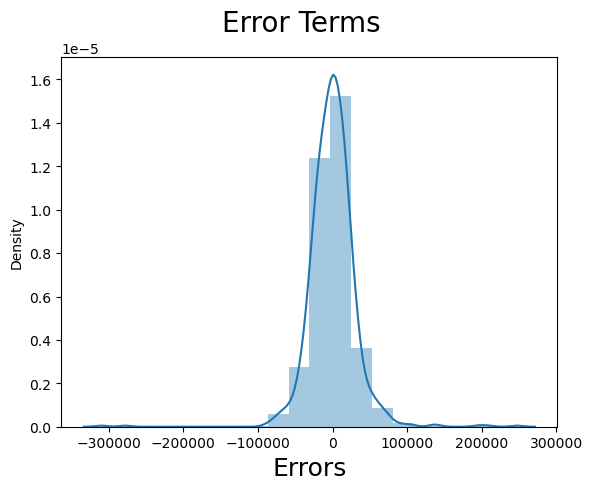

In [143]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [144]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.84

In [145]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1019130432092.1714
998168885.4967386
31593.810873282422


In [146]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

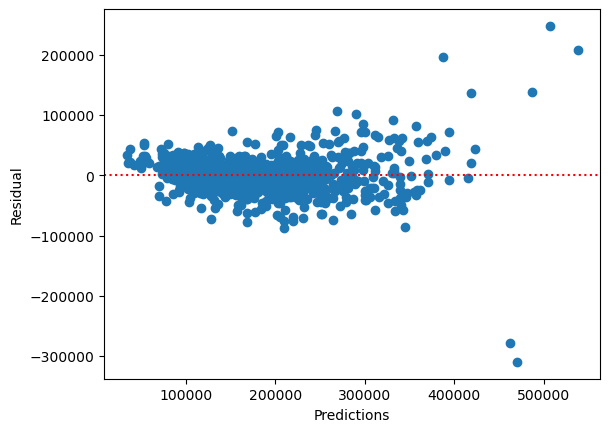

In [147]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [148]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,Fa

In [149]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,-0.032377,-0.068902,0.025916,-0.033111,-0.019212,-0.050044,0.026373,-0.010664,-0.016811,-0.091341,-0.030499,-0.012195,0.038505,0.042261,-0.105435,0.001920,0.027773,0.075129,0.049396,0.003095,-0.020822,0.015445,0.042849,-0.018849,-0.067836,-0.054609,0.066047,0.058699,-0.030043,0.039931,181645.895216,0.005526
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,0.935148,0.798998,0.949447,0.844311,0.949066,0.902588,1.009237,1.029982,0.961083,0.956973,0.966692,0.995798,1.014870,0.983782,0.846603,1.024904,1.042020,0.993950,0.973170,0.990890,1.006806,1.026307,1.023814,1.004550,0.887293,0.638820,1.280055,1.477231,0.348993,0.945506,80320.777267,0.991060
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,-0.964030,-0.293313,-1.256903,-2.314361,-2.208049,-2.098584,-0.789230,-0.124502,-2.227567,-0.837450,-0.247791,-2.840982,-0.753316,-3.484694,-4.580922,-2.293993,-2.806960,-0.927153,-0.985354,-4.106758,-2.375841,-2.225247,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-1.925187,37900.000000,-1.203301
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.688366,-0.542629,-1.181447,-0.680437,-0.789230,-0.124502,-0.747101,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.198233,-1.034916,-0.641156,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,132000.000000,-0.972515
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,-0.187498,-0.293313,-0.142124,-0.172157,-0.154845,-0.202692,-0.789230,-0.124502,-0.116915,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.238898,0.306009,-0.009406,-0.744598,-0.348159,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,165000.000000,-0.049373
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,0.555693,-0.293313,0.546809,0.405345,0.871757,0.434720,0.914249,-0.124502,0.520795,1.066863,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,0.622148,1.206469,0.291653,0.306009,0.490337,0.702136,0.279079,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,213075.000000,0.577044
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,3.742487,6.306447,3.057292,3.186070,0.871757,3.408051,2.861246,11.746585,3.931322,2.971177,8.047130,2.597723,3.242196,3.836032,8.459379,2.259799,3.424626,2.171449,1.754425,0.309238,1.646935,3.658517,5.106640,7.556556,4.668571,7.459033,9.126179,21.324526,4.240389,2.078846,611657.000000,3.247562


In [150]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [151]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_120', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn',
       'Exterio

In [152]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new.columns = X_train_new.columns.to_series().apply(lambda x: x.strip())
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [153]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new.astype(float)).fit()

In [154]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     52.58
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.11e-146
Time:                        17:54:44   Log-Likelihood:                -5109.3
No. Observations:                 439   AIC:                         1.033e+04
Df Residuals:                     383   BIC:                         1.056e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.546e+05   2.42e+04      6.398      0.000    1.07e+05    2.02e+05
OverallQual           2.447e+04   2747.157      8.908      0.000    1.91e+04    2.99e+04
BsmtQual              9830.6846   2955.440      3.326      0.001    4019.765    1.56e+04
BsmtExposure          5816.9699   1875.520      3.102      0.002    2129.366    9504.574
BsmtUnfSF            -1.052e+04   1838.553     -5.723      0.000   -1.41e+04   -6906.957
TotalBsmtSF           1.821e+04   4598.581      3.959      0.000    9164.149    2.72e+04
1stFlrSF              1.822e+04   3806.757      4.785      0.000    1.07e+04    2.57e+04
2ndFlrSF               2.54e+04   3531.167      7.193      0.000    1.85e+04    3.23e+04
GarageYrBlt          -4145.5350   4499.351     -0.921      0.357    -1.3e+04    4700.987
MSSubClass_30         4568.0095   7651.928      0.597      0.551   -1.05e+04    1.96e+04
MSSubClass_45         5068.4523   1.54e+04      0.330      0.742   -2.52e+04    3.53e+04
MSSubClass_50        -2708.1699   6511.198     -0.416      0.678   -1.55e+04    1.01e+04
MSSubClass_75        -2.741e+04   2.37e+04     -1.155      0.249   -7.41e+04    1.93e+04
MSSubClass_120       -2.282e+04   7544.286     -3.025      0.003   -3.77e+04   -7984.424
LotShape_IR2          4.117e+04   1.07e+04      3.847      0.000    2.01e+04    6.22e+04
LotShape_IR3          -1.09e+04   3.03e+04     -0.359      0.720   -7.06e+04    4.88e+04
LotConfig_CulDSac     9319.7095   6341.223      1.470      0.142   -3148.258    2.18e+04
LotConfig_FR2        -2773.3631   8034.617     -0.345      0.730   -1.86e+04     1.3e+04
Neighborhood_BrDale   -195.2303   1.57e+04     -0.012      0.990   -3.11e+04    3.07e+04
Neighborhood_Crawfor  2.822e+04   7890.671      3.576      0.000    1.27e+04    4.37e+04
Neighborhood_Edwards  -648.3157   7262.621     -0.089      0.929   -1.49e+04    1.36e+04
Neighborhood_MeadowV -3.578e+04   1.33e+04     -2.692      0.007   -6.19e+04   -9645.652
Neighborhood_NoRidge  3.881e+04   1.32e+04      2.945      0.003    1.29e+04    6.47e+04
Neighborhood_NridgHt  6.667e+04   8420.701      7.918      0.000    5.01e+04    8.32e+04
Neighborhood_SWISU   -1.608e+04   1.46e+04     -1.103      0.271   -4.47e+04    1.26e+04
Neighborhood_SawyerW  8084.0722   8842.998      0.914      0.361   -9302.828    2.55e+04
Neighborhood_Somerst  1.358e+04   6763.977      2.008      0.045     285.117    2.69e+04
Neighborhood_StoneBr  6.561e+04   1.04e+04      6.291      0.000    4.51e+04    8.61e+04
Neighborhood_Veenker  -3.56e-11   3.53e-11     -1.009      0.314   -1.05e-10    3.38e-11
HouseStyle_1.5Unf     5068.4523   1.54e+04      0.330      0.742   -2.52e+04    3.53e+04
HouseStyle_1Story     1.286e+04   8017.233      1.604      0.109   -2901.910    2.86e+04
HouseStyle_2.5Fin     6.973e+04   2.89e+04      2.414    

In [155]:
# Making predictions
X_train_new
#X_train_new = X_train_new.drop(['const'],axis=1)
y_pred = lm.predict(X_test_new)

### calculate r2 score of Test model

In [156]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.82

In [157]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

518059830986.1517
1180090731.1757433
34352.4486925713


In [158]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [159]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(np.array(X.values, dtype=float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,RoofStyle_Gable,83.47
56,GarageType_Attchd,83.34
60,GarageType_Detchd,38.59
34,RoofStyle_Hip,20.78
29,HouseStyle_1Story,13.07
...,...,...
43,Exterior1st_Stone,1.14
13,LotShape_IR2,1.13
14,LotShape_IR3,1.10
40,Exterior1st_ImStucc,1.07


Text(0, 0.5, 'y_pred')

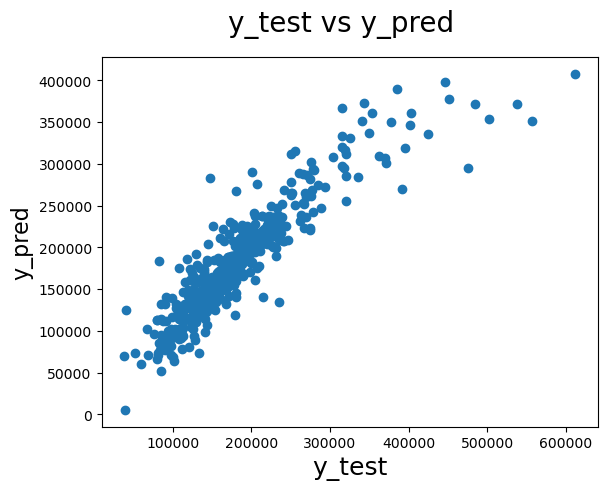

In [160]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [161]:
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_120', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn',
       'Exterio

In [162]:
#final dataframe 
final_df = df[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,6,284,1262,1262,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
2,7,434,920,920,866,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7,540,756,961,756,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,8,490,1145,1145,1053,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True


In [163]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.840308156164689
0.8166630492054506
1019130432092.1714
518059830986.1517
998168885.4967386
1180090731.1757433


### Ridge Regression

In [164]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [165]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [166]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 24721.87993132  10240.89952835  11243.89185702  -5986.07389703
   1941.41786508  24553.02592713  28868.49018861   1395.14985135
   -534.53769706   5535.86194015   9332.37203374  -4154.04829682
 -19297.42809653   5201.46975939 -16643.88519761  11456.50433565
  -8825.61408168  -7163.19673453  19210.39100664 -11287.10420463
  -5705.1323559   42517.09513416  41864.8197427   -3013.87408004
    739.06967336  16852.25279148  15079.99281013  12527.08682388
   7593.41233437  25937.46829374  -2872.40180078    511.57412478
   -992.85233287   3492.09655267   3210.182459     -649.42716333
   -347.32004891  -2557.13542239  11032.68977292  -3976.29973088
  -1722.66996318  -4209.03788687  -2978.53518113  -3705.81164908
  -5965.23962259   3462.02136073  -2560.65085219   8871.16929254
  -2038.71090652  -2191.29496201      0.          -3220.97945993
 -14705.54547724  -5484.18694835 -17381.34395824  10903.39706572
   6719.00537041  -6809.12845983   4874.71878216  -8510.1350245
    150.6790875 ]


In [167]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8325427904867035
0.819515515258042
1068687881544.1329
509999545949.80225
1046707033.8336267
1161730173.0063832


## Lasso

In [168]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [169]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [170]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [171]:
lasso.coef_

array([ 23890.90938689,  10157.04678123,  11690.93286243,  -5825.99796469,
          629.05894431,  24594.52530513,  29944.21654192,   1364.07632042,
           -0.        ,      0.        ,  10990.66833848,     -0.        ,
       -23467.62882518,   3528.433321  , -19957.20011773,  11848.34999412,
        -8260.33623198,  -2492.15087539,  24651.7139983 , -11098.2909366 ,
           -0.        ,  55758.64204484,  53390.70158214,     -0.        ,
          487.06634312,  21259.46302109,  25304.15204235,  16640.56709338,
        12768.85897474,  29889.05899121,     -0.        ,    895.03832539,
           -0.        ,      0.        ,   2986.18844125,     -0.        ,
           -0.        ,     -0.        ,  14760.4524273 ,  -2825.79281702,
           -0.        ,  -1237.90238682,     -0.        ,     -0.        ,
           -0.        ,   6053.90404971,     -0.        ,  14026.91338523,
           -0.        ,    -78.77223689,      0.        ,  -1374.57131906,
       -18697.6169292 ,  

In [172]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.835664289024395
0.8189486937256899
1048766925801.5627
511601227803.771
1027195813.7135776
1165378651.0336468


In [173]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.403082e-01,8.325428e-01,8.356643e-01
1,R2 Score (Test),8.166630e-01,8.195155e-01,8.189487e-01
2,RSS (Train),1.019130e+12,1.068688e+12,1.048767e+12
3,RSS (Test),5.180598e+11,5.099995e+11,5.116012e+11
4,MSE (Train),3.159381e+04,3.235285e+04,3.204990e+04
5,MSE (Test),3.435245e+04,3.408416e+04,3.413764e+04


## Lets observe the changes in the coefficients after regularization

In [174]:
betas = pd.DataFrame(index=X.columns)

In [175]:
betas.rows = X.columns

In [176]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [177]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,2.185045e+04,24721.879931,23890.909387
BsmtQual,1.115926e+04,10240.899528,10157.046781
BsmtExposure,1.193003e+04,11243.891857,11690.932862
BsmtUnfSF,-6.323465e+03,-5986.073897,-5825.997965
TotalBsmtSF,1.504893e+03,1941.417865,629.058944
1stFlrSF,2.327066e+04,24553.025927,24594.525305
2ndFlrSF,3.285379e+04,28868.490189,29944.216542
GarageYrBlt,5.623051e+03,1395.149851,1364.076320
MSSubClass_30,-1.210850e+03,-534.537697,-0.000000
MSSubClass_45,-3.235386e+03,5535.861940,0.000000


### Q1: Double the values of Alpha for lasso & Ridge

In [178]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 25744.12113841   9835.00466021  10761.79504755  -5800.49629686
   2706.73049453  24727.74650968  26981.77880711   1724.40483739
   -376.07935858   3510.07928924   6532.6456967   -3364.33468547
 -15044.48478053   4209.34258779 -11484.57699521  10252.25242055
  -6340.66712939  -5555.8947084   14212.33897708 -10119.26159761
  -3735.14089593  33509.22777363  33166.44465767  -2683.19225613
   -156.43485564  13169.65936128   8869.80907495   8054.04986555
   4335.34713148  20712.41064385  -1589.93121439  -2388.88380047
  -1793.76337594   2105.33274695   2791.27637074   -699.15131703
   -216.11089822  -1290.1811564    9016.45229188  -3255.78909663
   -540.65546851  -2774.7489049   -3272.31225797  -1852.96689088
  -6167.20478089   4653.39711132  -3158.57859302   5095.22951593
  -1278.53593078  -1722.98633439      0.          -2084.40447388
 -10446.23388266  -3677.6702868  -11610.46698238   8358.70790716
   5655.06729139  -5082.45727533   4670.19786822  -5496.92416993
  -1155.95445208]
0.82530

In [179]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 25223.05249275   9526.5219417   11318.45520521  -5472.01417096
      0.          25576.19447257  28415.90578567   1294.01527954
     -0.              0.           7138.55441594     -0.
 -18714.26922516    421.94023876  -8550.44666604  11130.68932078
  -2874.21346296     -0.          18717.53521602  -9673.99839195
     -0.          52029.87938799  48491.04785106     -0.
      0.          18025.09735041  13924.95127487   5460.29094867
    962.08487022  25847.01425359     -0.             -0.
     -0.              0.           2028.49041043     -0.
      0.             -0.          12302.71573699  -1505.59919134
     -0.             -0.             -0.             -0.
     -0.           6730.77328027   -763.22555098   3301.16576034
     -0.             -0.              0.             -0.
 -11959.08746735  -1682.14000453 -11691.52426805      0.
   6271.56648091     -0.           1409.47440901     -0.
     -0.        ]
0.8287077447073516
0.8137280293878867


In [180]:
lasso.coef_

array([ 25223.05249275,   9526.5219417 ,  11318.45520521,  -5472.01417096,
            0.        ,  25576.19447257,  28415.90578567,   1294.01527954,
           -0.        ,      0.        ,   7138.55441594,     -0.        ,
       -18714.26922516,    421.94023876,  -8550.44666604,  11130.68932078,
        -2874.21346296,     -0.        ,  18717.53521602,  -9673.99839195,
           -0.        ,  52029.87938799,  48491.04785106,     -0.        ,
            0.        ,  18025.09735041,  13924.95127487,   5460.29094867,
          962.08487022,  25847.01425359,     -0.        ,     -0.        ,
           -0.        ,      0.        ,   2028.49041043,     -0.        ,
            0.        ,     -0.        ,  12302.71573699,  -1505.59919134,
           -0.        ,     -0.        ,     -0.        ,     -0.        ,
           -0.        ,   6730.77328027,   -763.22555098,   3301.16576034,
           -0.        ,     -0.        ,      0.        ,     -0.        ,
       -11959.08746735,  

In [181]:
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_120', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn',
       'Exterio

In [182]:
(pd.DataFrame({'coef':lasso.coef_, 'category':X_train_new.columns})
.sort_values(by = 'coef', ascending = False)
.set_index('category'))

,coef
category,
Neighborhood_NoRidge,52029.879388
Neighborhood_NridgHt,48491.047851
2ndFlrSF,28415.905786
HouseStyle_1Story,25847.014254
1stFlrSF,25576.194473
OverallQual,25223.052493
Neighborhood_Crawfor,18717.535216
Neighborhood_Somerst,18025.097350
Neighborhood_StoneBr,13924.951275


### Q3: Drop the Top 5 features and rebuild lasso

In [183]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'HouseStyle_1Story'
                               , '1stFlrSF'], axis=1)

In [184]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'HouseStyle_1Story'
                               , '1stFlrSF'], axis=1)

In [185]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [186]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [187]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [188]:
lasso.coef_

array([ 45533.22325982,   2711.13973926,   7063.45523351,  -5379.88376111,
        20456.75865613,   2991.98758154,     -0.        ,     -0.        ,
            0.        ,      0.        , -21470.68839684,      0.        ,
           -0.        ,   9256.06063856,     -0.        ,     -0.        ,
        12848.37236005,   -715.96495593,     -0.        ,      0.        ,
           -0.        ,      0.        ,      0.        ,      0.        ,
           -0.        ,      0.        ,  -8638.79067339,  -4481.91903923,
            0.        ,      0.        ,      0.        ,      0.        ,
           -0.        ,    355.31115448,  -2301.34237244,     -0.        ,
           -0.        ,      0.        ,      0.        ,     -0.        ,
         4814.38293444,   -914.019862  ,      0.        ,     -0.        ,
           -0.        ,      0.        ,      0.        ,     -0.        ,
           -0.        ,     -0.        ,  18090.11492333,      0.        ,
           -0.        ,  

In [189]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7206129191880207
0.737796799585818


In [190]:
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_120', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn', 'Exterior2nd_HdBoard', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stucco',
       'Exterior2nd

In [191]:
(pd.DataFrame({'coef':lasso.coef_, 'category':X_train_new.columns})
.sort_values(by = 'coef', ascending = False)
.set_index('category'))

,coef
category,
OverallQual,45533.223260
TotalBsmtSF,20456.758656
Foundation_Slab,18090.114923
GarageType_BuiltIn,17849.856596
Neighborhood_Crawfor,12848.372360
LotConfig_CulDSac,9256.060639
BsmtExposure,7063.455234
Exterior1st_VinylSd,4814.382934
GarageYrBlt,2991.987582
